<a href="https://colab.research.google.com/github/naga8199/CMPE257-Fall23-NagaLakshmi-Nagubandi/blob/homework-3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 and part 2

In [1]:
import numpy as np

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

class NeuralNetwork:

    def __init__(self, input_units, hidden_units):

        self.W1 = np.random.randn(hidden_units, input_units)
        self.b1 = np.zeros((hidden_units, 1))
        self.W2 = np.random.randn(1, hidden_units)
        self.b2 = np.zeros((1, 1))

    def forward_propagation(self, X):

        # Compute the weighted sum of the inputs for the first layer
        self.Z1 = np.dot(self.W1, X) + self.b1
        # Apply the tanh activation function
        self.A1 = np.tanh(self.Z1)
        # Compute the weighted sum of the outputs of the first layer for the second layer
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        # Apply the tanh activation function
        self.A2 = np.tanh(self.Z2)
        # Return the output of the network
        return self.A2

    def back_propagation(self, X, Y):

        # Compute the number of samples
        m = X.shape[1]
        # Compute the difference between the network's output and the true labels
        dZ2 = self.A2 - Y
        # Compute the gradient of the weights of the second layer
        dW2 = 1/m * np.dot(dZ2, self.A1.T)
        # Compute the gradient of the biases of the second layer
        db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
        # Compute the derivative of the tanh activation function for the first layer
        dZ1 = np.dot(self.W2.T, dZ2) * tanh_derivative(self.Z1)
        # Compute the gradient of the weights of the first layer
        dW1 = 1/m * np.dot(dZ1, X.T)
        # Compute the gradient of the biases of the first layer
        db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
        # Return the gradients
        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):

        # Update the weights of the first layer
        self.W1 -= learning_rate * dW1
        # Update the biases of the first layer
        self.b1 -= learning_rate * db1
        # Update the weights of the second layer
        self.W2 -= learning_rate * dW2
        # Update the biases of the second layer
        self.b2 -= learning_rate * db2

    def train(self, X, Y, learning_rate, iterations):
        for i in range(iterations):
            self.forward_propagation(X)
            dW1, db1, dW2, db2 = self.back_propagation(X, Y)
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)


Part 3, 4 and 5

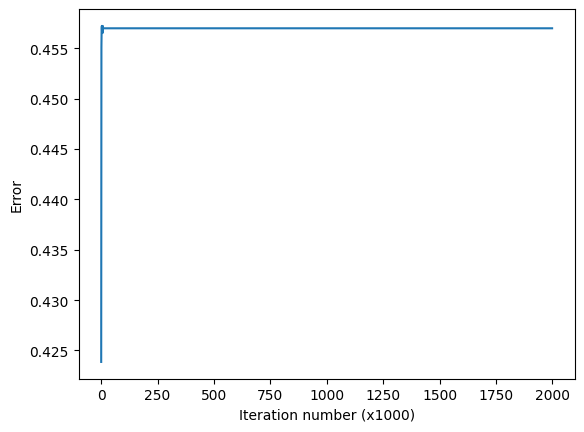

Test error: 0.4631465055272586


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Assuming df is the DataFrame
df = pd.read_csv('digits_data.csv')

# Filtering out only 1's and 5's
df = df[(df['Label'] == 1) | (df['Label'] == 5)]

# Splitting into features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Binarize the labels
lb = LabelBinarizer(neg_label=-1)
y = lb.fit_transform(y)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the neural network
nn = NeuralNetwork(256, 30)  # 256 input units (16x16 images), 30 hidden units

# Performing stochastic gradient descent
errors = []
n_iter = 2 * 10**6
for i in range(n_iter):
    # Picking up  a random sample
    idx = np.random.randint(0, X_train.shape[0])
    X_sample = X_train[idx].reshape(-1, 1)
    y_sample = y_train[idx].reshape(-1, 1)

    # Forward and backward propagation
    nn.forward_propagation(X_sample)
    dW1, db1, dW2, db2 = nn.back_propagation(X_sample, y_sample)

    # Update parameters
    nn.update_parameters(dW1, db1, dW2, db2, learning_rate=0.01)

    # Calculating error
    if i % 1000 == 0:
      # Compute error for every 1000 iterations
      predictions = np.sign(nn.forward_propagation(X_train.T))
      error = np.mean(predictions != y_train)
      errors.append(error)

# Plot error vs iteration number
plt.plot(errors)
plt.xlabel('Iteration number (x1000)')
plt.ylabel('Error')
plt.show()

# Compute test error
predictions = np.sign(nn.forward_propagation(X_test.T))
test_error = np.mean(predictions != y_test)
print(f'Test error: {test_error}')


HP

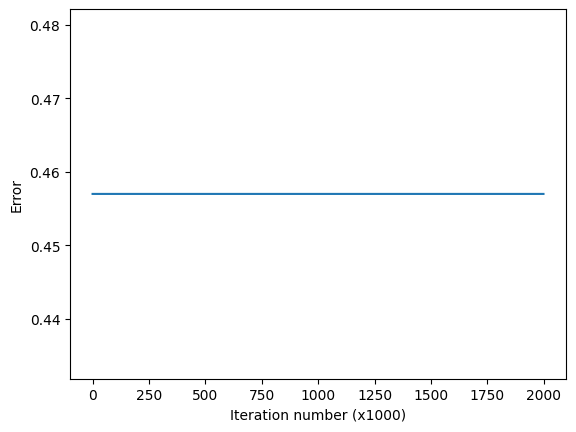

Test error: 0.46568812583572355


In [ ]:
# Perform mini-batch gradient descent
errors = []
batch_size = 32
for i in range(n_iter):
    # Pick a random batch of samples
    idx = np.random.choice(X_train.shape[0], batch_size)
    X_batch = X_train[idx].T
    y_batch = y_train[idx].T

    # Forward and backward propagation
    nn.forward_propagation(X_batch)
    dW1, db1, dW2, db2 = nn.back_propagation(X_batch, y_batch)

    # Update parameters
    nn.update_parameters(dW1, db1, dW2, db2, learning_rate=0.01)

    # Compute error
    if i % 1000 == 0:  # Compute error every 1000 iterations
        predictions = np.sign(nn.forward_propagation(X_train.T))
        error = np.mean(predictions != y_train)
        errors.append(error)

# Plot error vs iteration number
plt.plot(errors)
plt.xlabel('Iteration number (x1000)')
plt.ylabel('Error')
plt.show()

# Compute test error
predictions = np.sign(nn.forward_propagation(X_test.T))
test_error = np.mean(predictions != y_test)
print(f'Test error: {test_error}')
